In [ ]:
import cv2
import os
from dotenv import find_dotenv, load_dotenv
import sys
load_dotenv(find_dotenv())

PATH_P = os.environ['PATH_P']
os.chdir(PATH_P)
sys.path.insert(0, PATH_P)
import src.helper.helper as hf
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('ggplot')

import src.visualization.visualization as vs
import src.helper.helper as hf
import pandas as pd
# load_model_sample.py
from keras import backend as K
K.set_image_dim_ordering('tf')
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, LSTM
from keras.layers import Dropout, Flatten, Dense,BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
import src.helper.helper as hf
from src.models.tests.model.Conv_net import Conv_net
import cv2
import numpy as np
import os
from PIL import Image



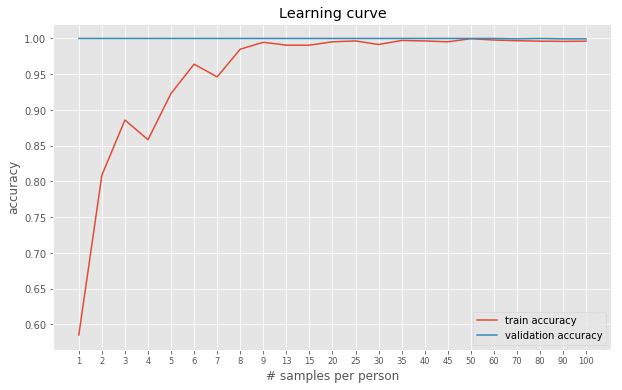

In [2]:
path = './models/conv/learning_curve/'
fig, ax = plt.subplots(figsize=(10, 6))
nr = os.listdir(path)
nr = sorted(list(map(int,nr)))
val_acc_a = []
acc_a     = []
nr_str = list(map(str,nr))
for i in range(len(nr)):
    path_g  = path+str(nr[i])+'/0/hist.csv'
    hist    = pd.read_csv(path_g)
    val_acc = max(hist['val_acc'])
    acc     = max(hist['acc'])
    val_acc_a.append(val_acc)
    acc_a.append(acc)
plt.plot(val_acc_a, label = 'train accuracy')
plt.plot(acc_a,     label = 'validation accuracy')
plt.title('Learning curve')
plt.legend()
plt.xlabel('# samples per person')
plt.xticks(range(len(nr_str)), nr_str, size='small')
plt.yticks(np.arange(0.6,1.01,0.05))
plt.ylabel('accuracy')
plt.show()
fig.savefig('./notebooks/images/LC.png')

In [3]:
path = './models/conv/BO_no_data_aug/'
threshold = 100000

vs.plot_progress(path,threshold)

FileNotFoundError: [Errno 2] No such file or directory: './models/conv/BO_no_data_aug/'

In [ ]:
path = './models/conv/BO_no_data_aug/'
fig, ax = plt.subplots(figsize=(20, 12))

plt.subplot(221)
dict_ = vs.return_BN(path)
plt.hist(dict_['false'], label = 'False',bins = 10,alpha = 0.5)
plt.hist(dict_['true'], label = ' True', bins = 10, alpha = 0.5)
plt.legend()
plt.title('Histogram of number of times batch normalization was chosen')
plt.xlabel('validation accuracy')
plt.ylabel('frequency')

plt.subplot(222)
dict_ = vs.return_filters(path)        
plt.hist(dict_[3], label = '3',bins = 20,alpha = 0.5 , color = 'b')
plt.hist(dict_[4], label = ' 4', bins = 20, alpha = 0.5, color = 'r')
plt.hist(dict_[5], label = ' 5', bins = 20, alpha = 0.5, color = 'y')
plt.legend()
plt.title('Histogram of number of times the amount of filters was chosen')
plt.xlabel('validation accuracy')
plt.ylabel('frequency')

plt.subplot(223)
x,y = vs.return_dropout(path)
plt.title('histogram of dropout for every attempt above 0.995 validation accuracy ')
plt.xlabel('validation accuracy')
plt.ylabel('frequency')
plt.hist(x)


plt.subplot(224)
x,y = vs.return_LR(path)
plt.title('histogram of learning rate every attempt above 0.995 validation accuracy')
plt.xlabel('validation accuracy')
plt.ylabel('frequency')
plt.hist(x)

plt.show()

fig.savefig('./notebooks/images/histograms.png')

In [ ]:
def best_solution(path):
    names = os.listdir(path)

    for i in range(len(names)):
        names[i] = int(names[i])

    names = sorted(names)

    min_  = 100000000
    dict_ = None
    hist_ = None
    
    for name in names:
        try:

            path_h = path+str(name)+'/hist.p'
            path_d = path+str(name)+'/dict.p'

            p      = hf.pickle_load(path_h)
            d      = hf.pickle_load(path_d)

            val    = np.max(p['history']['val_acc'])
            count_ = p['count']

            if(val> 0.995):
                opt_value = count_/val

            else:
                opt_value = count_/val + 10000
                
            if (opt_value < min_):
                min_  = opt_value
                dict_ = d
                hist_ = p
        except Exception as e:
            print(e)
    return dict_,hist_, min_


path = './models/conv/BO_no_data_aug/'
dict_, hist,min_ = best_solution(path)


print('optimal value: ',min_)
print(dict_['filters'])
print(dict_['dropout'])
print(dict_['lr'])
print(dict_['batch_norm'])
print(hist['count'])
print(max(hist['history']['val_acc']))

In [ ]:
plt.plot(hist['history']['val_acc'], color = 'b')
plt.plot(hist['history']['acc'], color = 'r')
plt.show()

## Predict

In [ ]:
path = './models/conv/model_generated_data/'

def best_solution(path):
    names = os.listdir(path)
    names_int = []
    
    for i in range(len(names)):
        try:
            names_int.append(int(names[i]))
        except Exception as e:
            print(e)
            

    names = sorted(names)

    max_  = 0
    dict_ = None
    hist_ = None
    for name in names:
        try:

            path_h = path+str(name)+'/hist.csv'
            path_d = path+str(name)+'/dict.p'
            p      = pd.read_csv(path_h)
            d      = hf.pickle_load(path_d)

            val    = np.max(p['val_acc'])

            if (val > max_):
                
                max_  = val
                dict_ = d
                hist_ = p
                path_r= path+str(name)
        
        except Exception as e:
            print(e)
    return dict_,hist_, max_,path_r


dict_,hist_, min_,path =  best_solution(path)
print(min_)
print(path)

print(dict_['filters'])


In [5]:
path          = './models/conv/model_generated_data/41/'
conv          = Conv_net(path = path)
model         = conv.load_model()
test_datagen = conv.return_img_gen() 

CREATE DIR IS TRIGGERED
tensorboard --logdir ~/Dropbox/Code/Beeldverwerking/git/models/conv/model_generated_data/41/tensorboard


In [7]:
# print(validation_generator.class_indices
names = ['Fabrice/', 'Jeffrey/', 'Pieter/']
# names = ['Fabrice/']

for k, name in enumerate(names):
    predictions = []
    pred_2      = []
    for index in range(120):
        # path config
        path = './data/processed/OGD/train/'
        path_t = path + name
        path_g = path_t + os.listdir(path_t)[index]

        # keras method for predicting
        x = load_img(path_g,grayscale=True,target_size=(160,220))
        x = img_to_array(x, data_format='channels_last')
        x = x.reshape(1,160,220,1)
        x = test_datagen.flow(x)[0]

        pred = model.predict(x)
        predictions.append(np.argmax(pred))
        
        
        ### own made method
        p    = cv2.imread(path_g)
        pred = conv.predict(p)
        pred_2.append(np.argmax(pred))

    dict_ = {}
    for pred in predictions:
        try:
            dict_[pred] += 1. / float(len(predictions))
        except:
            dict_[pred] = 1. / float(len(predictions))
    
    
    print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXxx')
    print(name)
    print(dict_)
    
    dict_ = {}
    for pred in pred_2:
        try:
            dict_[pred] += 1. / float(len(predictions))
        except:
            dict_[pred] = 1. / float(len(predictions))
    print(dict_)

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXxx
Fabrice/
{0: 0.9666666666666657, 1: 0.008333333333333333, 2: 0.025}
{0: 0.9666666666666657, 1: 0.008333333333333333, 2: 0.025}
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXxx
Jeffrey/
{1: 0.9916666666666656, 2: 0.008333333333333333}
{1: 0.9916666666666656, 2: 0.008333333333333333}
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXxx
Pieter/
{1: 0.008333333333333333, 2: 0.9916666666666656}
{1: 0.008333333333333333, 2: 0.9916666666666656}
